<a href="https://colab.research.google.com/github/Zain-Pirzada/Diabetic-Reinopathy-Kaggle-Competition/blob/main/DR_FYP_Work_Google_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import data from gogle drivet**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Keras**

In [ ]:
!pip install -q keras

In [3]:
import keras

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 439 kB 66.9 MB/s 
     |████████████████████████████████| 1.7 MB 56.4 MB/s 
     |████████████████████████████████| 6.0 MB 61.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



**Transfer Learning Inception V3 Using Keras**

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASETS__resize_split/train'
valid_path = '/content/drive/MyDrive/DATASETS__resize_split/test'

In [6]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DATASETS__resize_split/train*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)



In [10]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
import matplotlib.pyplot as plt


In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS__resize_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 21083 images belonging to 5 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS__resize_split/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 7030 images belonging to 5 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
1318/1318 [==============================] - 4466s 3s/step - loss: 5.1763 - accuracy: 0.5957 - val_loss: 4.2540 - val_accuracy: 0.5546
Epoch 2/10
1318/1318 [==============================] - 3180s 2s/step - loss: 5.2729 - accuracy: 0.6132 - val_loss: 4.3863 - val_accuracy: 0.7095
Epoch 3/10
1318/1318 [==============================] - 3179s 2s/step - loss: 5.3400 - accuracy: 0.6207 - val_loss: 4.8602 - val_accuracy: 0.5504
Epoch 4/10
1318/1318 [==============================] - 3184s 2s/step - loss: 5.0304 - accuracy: 0.6282 - val_loss: 4.8867 - val_accuracy: 0.6646
Epoch 5/10
1318/1318 [==============================] - 3181s 2s/step - loss: 5.2043 - accuracy: 0.6348 - val_loss: 5.6808 - val_accuracy: 0.4112
Epoch 6/10
1318/1318 [==============================] - 3182s 2s/step - loss: 5.2163 - accuracy: 0.6363 - val_loss: 6.1113 - val_accuracy: 0.7117
Epoch 7/10
1318/1318 [==============================] - 3219s 2s/step - loss: 5.3057 - accuracy: 0.6390 - val_loss: 5.1735 -

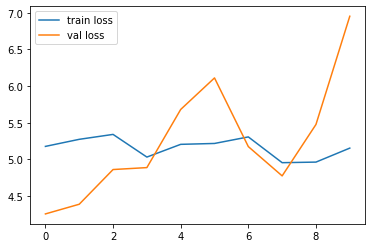

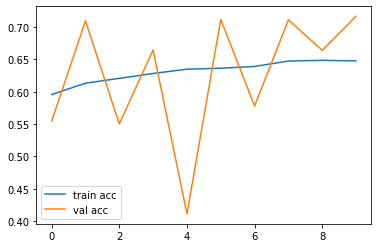

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5'

SyntaxError: ignored

In [20]:
y_pred = model.predict(test_set)

440/440 [==============================] - 753s 2s/step


In [21]:
y_pred

array([[9.9999994e-01, 7.2470981e-17, 1.3339363e-10, 1.3964256e-37,
        0.0000000e+00],
       [9.9999994e-01, 2.6941732e-10, 3.5951583e-20, 0.0000000e+00,
        0.0000000e+00],
       [9.9017155e-01, 2.7882936e-04, 9.5495507e-03, 3.4084424e-17,
        5.2923253e-25],
       ...,
       [9.9994087e-01, 1.6587275e-10, 5.9104012e-05, 2.9038511e-38,
        0.0000000e+00],
       [1.0000000e+00, 4.2425480e-22, 1.1834858e-16, 0.0000000e+00,
        0.0000000e+00],
       [3.9360639e-05, 4.7377011e-06, 9.9995589e-01, 5.5003756e-23,
        0.0000000e+00]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
img_data

NameError: ignored